In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
#model inceptionv3
model_predi = tf.keras.models.load_model('covid-19_cnn.model_r')


In [6]:
import cv2
training_data = []
size=224

In [7]:
#COVID-19
img_path1=r'D:\Project\Project 8\Image_test\covid'
for i in os.listdir(img_path1):
    read_path=os.path.join(img_path1,i)
    class_type=2
    try:
        img=cv2.imread(read_path)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_data.append([img,class_type])  
    except Exception as e:      
         pass

        
        
#PNEUMONIA
img_path1=r'D:\Project\Project 8\Image_test\normal'

for i in os.listdir(img_path1):
    read_path=os.path.join(img_path1,i)
    class_type=0
    try:
        img=cv2.imread(read_path)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_data.append([img,class_type])  
    except Exception as e:      
         pass

 

 #NORMAL
img_path1=r'D:\Project\Project 8\Image_test\pneu'

for i in os.listdir(img_path1):
    read_path=os.path.join(img_path1,i)
    class_type=1
    try:
        img=cv2.imread(read_path)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_data.append([img,class_type])  
    except Exception as e:      
         pass


In [8]:
from random import shuffle
shuffle(training_data)

import numpy as np

X_test=[]
y_test=[]
for features,label in training_data:
    X_test.append(features)
    y_test.append(label)
    
X_test=np.array(X_test) / 255.0  
y_test=np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(10, 224, 224, 3)
(10,)


In [9]:
from collections import Counter
y_dist = Counter(y_test)
print (y_dist)

Counter({2: 6, 1: 2, 0: 2})


In [10]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_predi.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00         2
   PNEUMONIA       1.00      1.00      1.00         2
    COVID-19       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        1

In [11]:
from sklearn.metrics import confusion_matrix
cm_r=confusion_matrix(y_test, prediction)

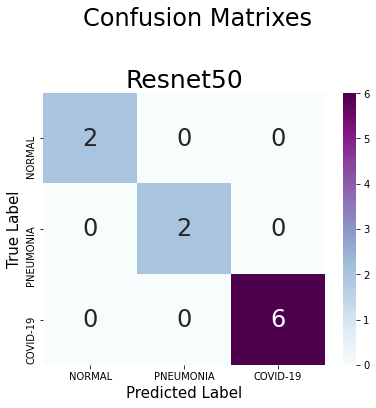

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Resnet50",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_r,annot=True,cmap="BuPu",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

In [13]:
label = list(map(str,y_test))
#label[0] 

for i in range(len(label)):
    if label[i]=='0':
        label[i]='NORMAL'
    if label[i]=='1':
        label[i]='PNEUMONIA'
    if label[i]=='2':
       label[i]='COVID-19' 
        
#label      

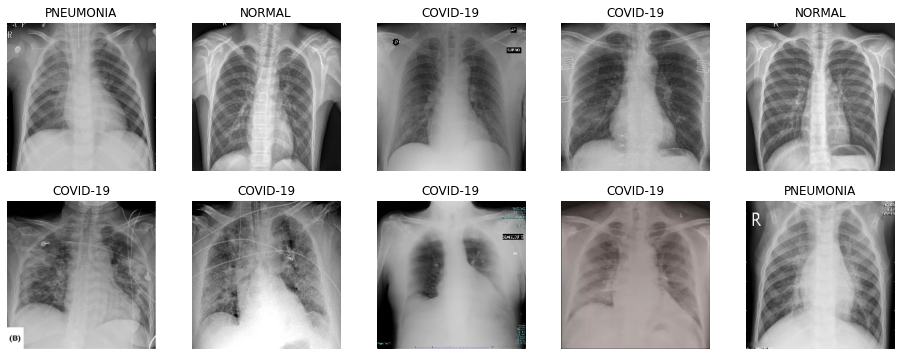

In [15]:
import matplotlib.pyplot as plt
import random

#plt.figure(figsize=(16,6))
fig, m_axs = plt.subplots(4, 4, figsize = (16, 6))

for n in range(10):
    plt.subplot(2,5,n+1)
    plt.imshow(X_test[n])
    plt.title(label[n])
    plt.axis('off')  
    #plt.suptitle("Image",color='white',size=20)


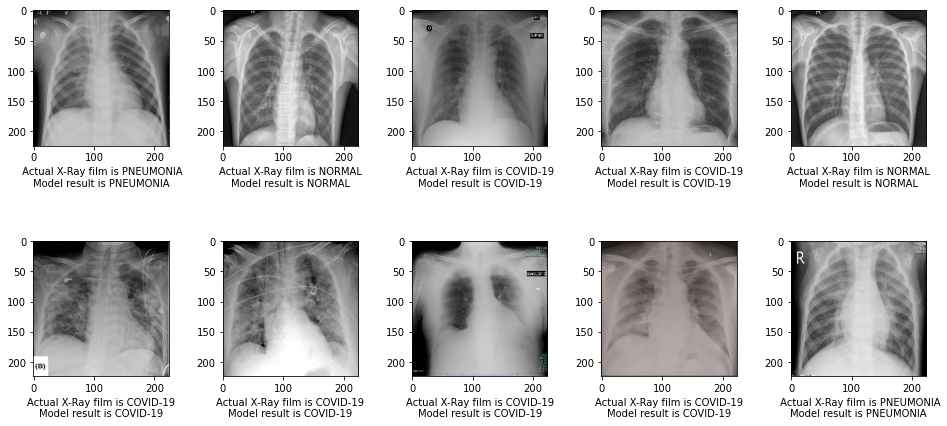

In [16]:



fig, ax = plt.subplots(figsize = (16, 20))



n=0

for n in range(10):
    plt.subplot(5,5,n+1)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
    

    plt.imshow(X_test[n])
    plt.axis()
    if y_test[n] == 0:
        
        if prediction[n] == 0:
            plt.xlabel('Actual X-Ray film is NORMAL\nModel result is NORMAL')
        if prediction[n] == 1:
            plt.xlabel('Actual X-Ray film is NORMAL\nModel result is PNEUMONIA')
        if prediction[n] == 2:
            plt.xlabel('Actual X-Ray film is NORMAL\nModel result is NORMAL')
    if y_test[n] == 1:
        
        if prediction[n] == 0:
             plt.xlabel('Actual X-Ray film is PNEUMONIA\nModel result is NORMAL')
        if prediction[n] == 1:
            plt.xlabel(' Actual X-Ray film is PNEUMONIA\nModel result is PNEUMONIA')
        if prediction[n] == 2:
             plt.xlabel('Actual X-Ray film is PNEUMONIA\nModel result is NORMAL')
    if y_test[n] == 2:
        
        if prediction[n] == 0:
             plt.xlabel('Actual X-Ray film is COVID-19\nModel result is NORMAL')
        if prediction[n] == 1:
             plt.xlabel('Actual X-Ray film is COVID-19\nModel result is PNEUMONIA')
        if prediction[n] == 2:
            plt.xlabel('Actual X-Ray film is COVID-19\nModel result is COVID-19')

        



    